# Used Car Price Prediction using Ensemble Regression Models

**Objective:** Predict the resale price of used cars using ensemble machine learning regression models.

**Dataset:** Used car market data with information on brand, model, year, mileage, fuel type, transmission, and other features.

**Target Variable:** selling_price (continuous numerical value)

Dataset Link : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data


## By 23AIML042

if google colab then use opendatasets library to download dataset

```pip install opendatasets```

```
import opendatasets as od
od.download("https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data")

```

```
My kaggle cradentials
{"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}
```

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

## 2. Load Dataset

In [ ]:
df1 = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
df2 = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv")
df3 = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
df4 = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv")

def clean_cols(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )
    return df

df1 = clean_cols(df1)
df2 = clean_cols(df2)
df3 = clean_cols(df3)
df4 = clean_cols(df4)
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
df.shape

(14828, 30)

In [ ]:
# Display first rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,present_price,kms_driven,fuel_type,make,model,price,kilometer,location,color,max_torque,drivetrain,length,width,height,seating_capacity,fuel_tank_capacity
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display last rows
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_name,present_price,kms_driven,fuel_type,make,model,price,kilometer,location,color,max_torque,drivetrain,length,width,height,seating_capacity,fuel_tank_capacity
14823,NaN,2016,NaN,NaN,NaN,Individual,Manual,First,NaN,2179 cc,138 bhp @ 3750 rpm,NaN,NaN,NaN,NaN,NaN,Diesel,Mahindra,XUV500 W8 [2015-2017],850000.0,90300.0,Surat,White,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
14824,NaN,2014,NaN,NaN,NaN,Individual,Manual,Second,NaN,814 cc,55 bhp @ 5500 rpm,NaN,NaN,NaN,NaN,NaN,Petrol,Hyundai,Eon D-Lite +,275000.0,83000.0,Ahmedabad,White,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
14825,NaN,2013,NaN,NaN,NaN,Individual,Manual,First,NaN,1196 cc,70 bhp @ 6250 rpm,NaN,NaN,NaN,NaN,NaN,Petrol,Ford,Figo Duratec Petrol ZXI 1.2,240000.0,73000.0,Thane,Silver,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
14826,NaN,2018,NaN,NaN,NaN,Individual,Automatic,First,NaN,1995 cc,188 bhp @ 4000 rpm,NaN,NaN,NaN,NaN,NaN,Diesel,BMW,5-Series 520d Luxury Line [2017-2019],4290000.0,60474.0,Coimbatore,White,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
14827,NaN,2017,NaN,NaN,NaN,Individual,Manual,First,NaN,1493 cc,70 bhp @ 3600 rpm,NaN,NaN,NaN,NaN,NaN,Diesel,Mahindra,Bolero Power Plus ZLX [2016-2019],670000.0,72000.0,Guwahati,White,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


## 3. Initial Data Exploration

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                12468 non-null  object 
 1   year                14828 non-null  int64  
 2   selling_price       12769 non-null  float64
 3   km_driven           12468 non-null  float64
 4   fuel                12468 non-null  object 
 5   seller_type         14828 non-null  object 
 6   transmission        14828 non-null  object 
 7   owner               14828 non-null  object 
 8   mileage             7907 non-null   object 
 9   engine              9886 non-null   object 
 10  max_power           9892 non-null   object 
 11  torque              7906 non-null   object 
 12  seats               7907 non-null   float64
 13  car_name            301 non-null    object 
 14  present_price       301 non-null    float64
 15  kms_driven          301 non-null    float64
 16  fuel

In [ ]:
# Statistical summary
df.describe()

,year,selling_price,km_driven,seats,present_price,kms_driven,price,kilometer,length,width,height,seating_capacity,fuel_tank_capacity
count,14828.000000,1.276900e+04,1.246800e+04,7907.000000,301.000000,301.000000,2.059000e+03,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,2013.955692,5.776323e+05,6.856508e+04,5.416719,7.628472,36947.205980,1.702992e+06,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,4.121330,7.345433e+05,5.333721e+04,0.959588,8.644115,38886.883882,2.419881e+06,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,1983.000000,1.000000e-01,1.000000e+00,2.000000,0.320000,500.000000,4.900000e+04,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,2012.000000,2.250000e+05,3.500000e+04,5.000000,1.200000,15000.000000,4.849990e+05,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,2015.000000,4.000000e+05,6.000000e+04,5.000000,6.400000,32000.000000,8.250000e+05,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,2017.000000,6.500000e+05,9.000000e+04,5.000000,9.900000,48767.000000,1.925000e+06,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,2022.000000,1.000000e+07,2.360457e+06,14.000000,92.600000,500000.000000,3.500000e+07,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'car_name', 'present_price', 'kms_driven', 'fuel_type', 'make', 'model', 'price', 'kilometer', 'location', 'color', 'max_torque', 'drivetrain', 'length', 'width', 'height', 'seating_capacity', 'fuel_tank_capacity']


In [ ]:
# Data types
print("Data Types:")
print(df.dtypes)

Data Types:
name                   object
year                    int64
selling_price         float64
km_driven             float64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage                object
engine                 object
max_power              object
torque                 object
seats                 float64
car_name               object
present_price         float64
kms_driven            float64
fuel_type              object
make                   object
model                  object
price                 float64
kilometer             float64
location               object
color                  object
max_torque             object
drivetrain             object
length                float64
width                 float64
height                float64
seating_capacity      float64
fuel_tank_capacity    float64
dtype: object


## 4. Missing Values Analysis

In [ ]:
# Check missing values
print("Missing Values Count:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values Count:
name                   2360
year                      0
selling_price          2059
km_driven              2360
fuel                   2360
seller_type               0
transmission              0
owner                     0
mileage                6921
engine                 4942
max_power              4936
torque                 6922
seats                  6921
car_name              14527
present_price         14527
kms_driven            14527
fuel_type             12468
make                  12769
model                 12769
price                 12769
kilometer             12769
location              12769
color                 12769
max_torque            12849
drivetrain            12905
length                12833
width                 12833
height                12833
seating_capacity      12833
fuel_tank_capacity    12882
dtype: int64

Total Missing Values: 262412


In [ ]:
# Missing values percentage
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

                    Missing_Count  Percentage
name                         2360   15.915835
selling_price                2059   13.885892
km_driven                    2360   15.915835
fuel                         2360   15.915835
mileage                      6921   46.675209
engine                       4942   33.328837
max_power                    4936   33.288373
torque                       6922   46.681953
seats                        6921   46.675209
car_name                    14527   97.970057
present_price               14527   97.970057
kms_driven                  14527   97.970057
fuel_type                   12468   84.084165
make                        12769   86.114108
model                       12769   86.114108
price                       12769   86.114108
kilometer                   12769   86.114108
location                    12769   86.114108
color                       12769   86.114108
max_torque                  12849   86.653628
drivetrain                  12905 

## 5. Duplicate Records Analysis

In [ ]:
# Check duplicates
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 1969


In [ ]:
# Display duplicates if any
if df.duplicated().sum() > 0:
    print("Sample Duplicate Rows:")
    print(df[df.duplicated()].head())
else:
    print("No duplicate rows found.")

Sample Duplicate Rows:
                        name  year  selling_price  km_driven    fuel  \
13             Maruti 800 AC  2007        60000.0    70000.0  Petrol   
14  Maruti Wagon R LXI Minor  2007       135000.0    50000.0  Petrol   
15      Hyundai Verna 1.6 SX  2012       600000.0   100000.0  Diesel   
16    Datsun RediGO T Option  2017       250000.0    46000.0  Petrol   
17     Honda Amaze VX i-DTEC  2014       450000.0   141000.0  Diesel   

   seller_type transmission         owner mileage engine max_power torque  \
13  Individual       Manual   First Owner     NaN    NaN       NaN    NaN   
14  Individual       Manual   First Owner     NaN    NaN       NaN    NaN   
15  Individual       Manual   First Owner     NaN    NaN       NaN    NaN   
16  Individual       Manual   First Owner     NaN    NaN       NaN    NaN   
17  Individual       Manual  Second Owner     NaN    NaN       NaN    NaN   

    seats car_name  present_price  kms_driven fuel_type make model  price  \
13  

## 6. Target Variable Analysis

In [ ]:
# Target variable: selling_price
print("Selling Price Statistics:")
print(df['selling_price'].describe())

Selling Price Statistics:
count    1.276900e+04
mean     5.776323e+05
std      7.345433e+05
min      1.000000e-01
25%      2.250000e+05
50%      4.000000e+05
75%      6.500000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


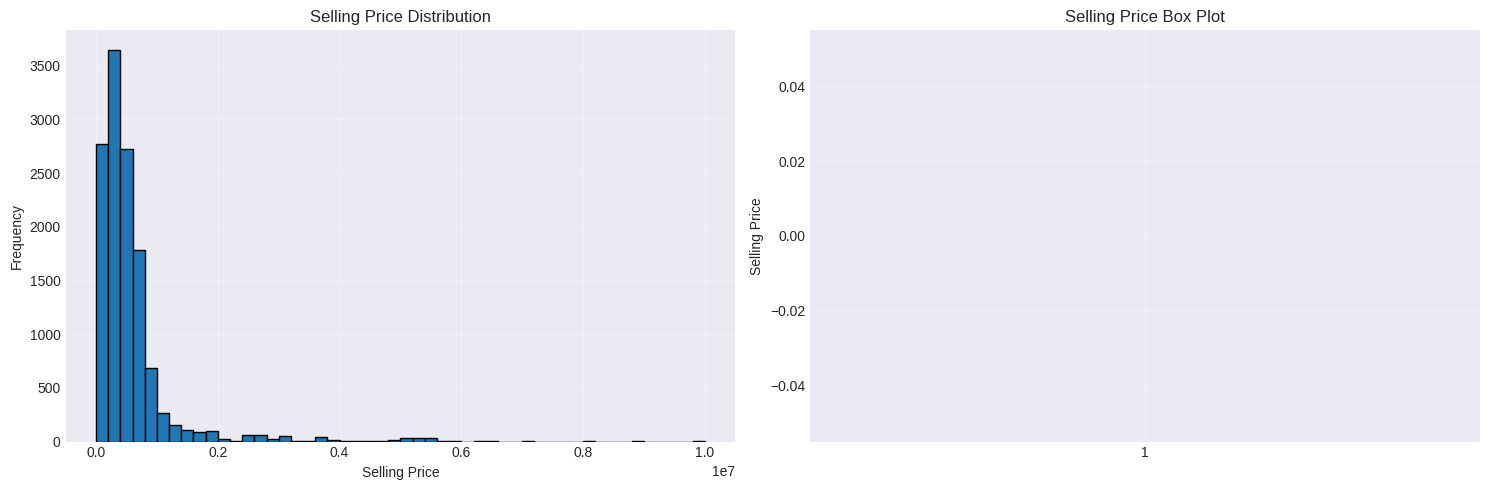

In [ ]:
# Distribution of selling price
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['selling_price'], bins=50, edgecolor='black')
axes[0].set_title('Selling Price Distribution')
axes[0].set_xlabel('Selling Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df['selling_price'])
axes[1].set_title('Selling Price Box Plot')
axes[1].set_ylabel('Selling Price')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Feature Analysis

In [ ]:
# Expected columns based on your image
expected_cols = ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
                 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
                 'seats', 'car_name', 'present_price', 'kms_driven', 'fuel_type', 'make',
                 'model', 'price', 'kilometer', 'location', 'color', 'max_torque',
                 'drivetrain', 'length', 'width', 'height', 'seating_capacity',
                 'fuel_tank_capacity']

# Check which columns are actually present
present_cols = [col for col in expected_cols if col in df.columns]
print(f"Columns present in dataset: {len(present_cols)} out of {len(expected_cols)}")

Columns present in dataset: 30 out of 30


In [ ]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target from numerical columns
if 'selling_price' in numerical_cols:
    numerical_cols.remove('selling_price')

print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols[:10]}...") if len(categorical_cols) > 10 else print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical Features ({len(numerical_cols)}): {numerical_cols[:10]}...") if len(numerical_cols) > 10 else print(f"\nNumerical Features ({len(numerical_cols)}): {numerical_cols}")

Categorical Features (17): ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'car_name']...

Numerical Features (12): ['year', 'km_driven', 'seats', 'present_price', 'kms_driven', 'price', 'kilometer', 'length', 'width', 'height']...


In [ ]:
# Unique values in categorical features
print("Unique Values in Categorical Features:")
for col in categorical_cols[:10]:  # Show first 10
    print(f"{col}: {df[col].nunique()} unique values")

Unique Values in Categorical Features:
name: 2511 unique values
fuel: 5 unique values
seller_type: 5 unique values
transmission: 2 unique values
owner: 14 unique values
mileage: 393 unique values
engine: 229 unique values
max_power: 657 unique values
torque: 441 unique values
car_name: 98 unique values


In [ ]:
# Statistical summary of numerical features
df[numerical_cols].describe()

,year,km_driven,seats,present_price,kms_driven,price,kilometer,length,width,height,seating_capacity,fuel_tank_capacity
count,14828.000000,1.246800e+04,7907.000000,301.000000,301.000000,2.059000e+03,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,2013.955692,6.856508e+04,5.416719,7.628472,36947.205980,1.702992e+06,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,4.121330,5.333721e+04,0.959588,8.644115,38886.883882,2.419881e+06,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,1983.000000,1.000000e+00,2.000000,0.320000,500.000000,4.900000e+04,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,2012.000000,3.500000e+04,5.000000,1.200000,15000.000000,4.849990e+05,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,2015.000000,6.000000e+04,5.000000,6.400000,32000.000000,8.250000e+05,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,2017.000000,9.000000e+04,5.000000,9.900000,48767.000000,1.925000e+06,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,2022.000000,2.360457e+06,14.000000,92.600000,500000.000000,3.500000e+07,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


## 8. Univariate Analysis - Key Numerical Features

In [ ]:
# Select key numerical features for visualization
key_numerical = ['year', 'km_driven', 'present_price', 'price', 'kilometer'] if all(col in numerical_cols for col in ['year', 'km_driven']) else numerical_cols[:6]
key_numerical = [col for col in key_numerical if col in numerical_cols][:6]

print(f"Analyzing key numerical features: {key_numerical}")

Analyzing key numerical features: ['year', 'km_driven', 'present_price', 'price', 'kilometer']


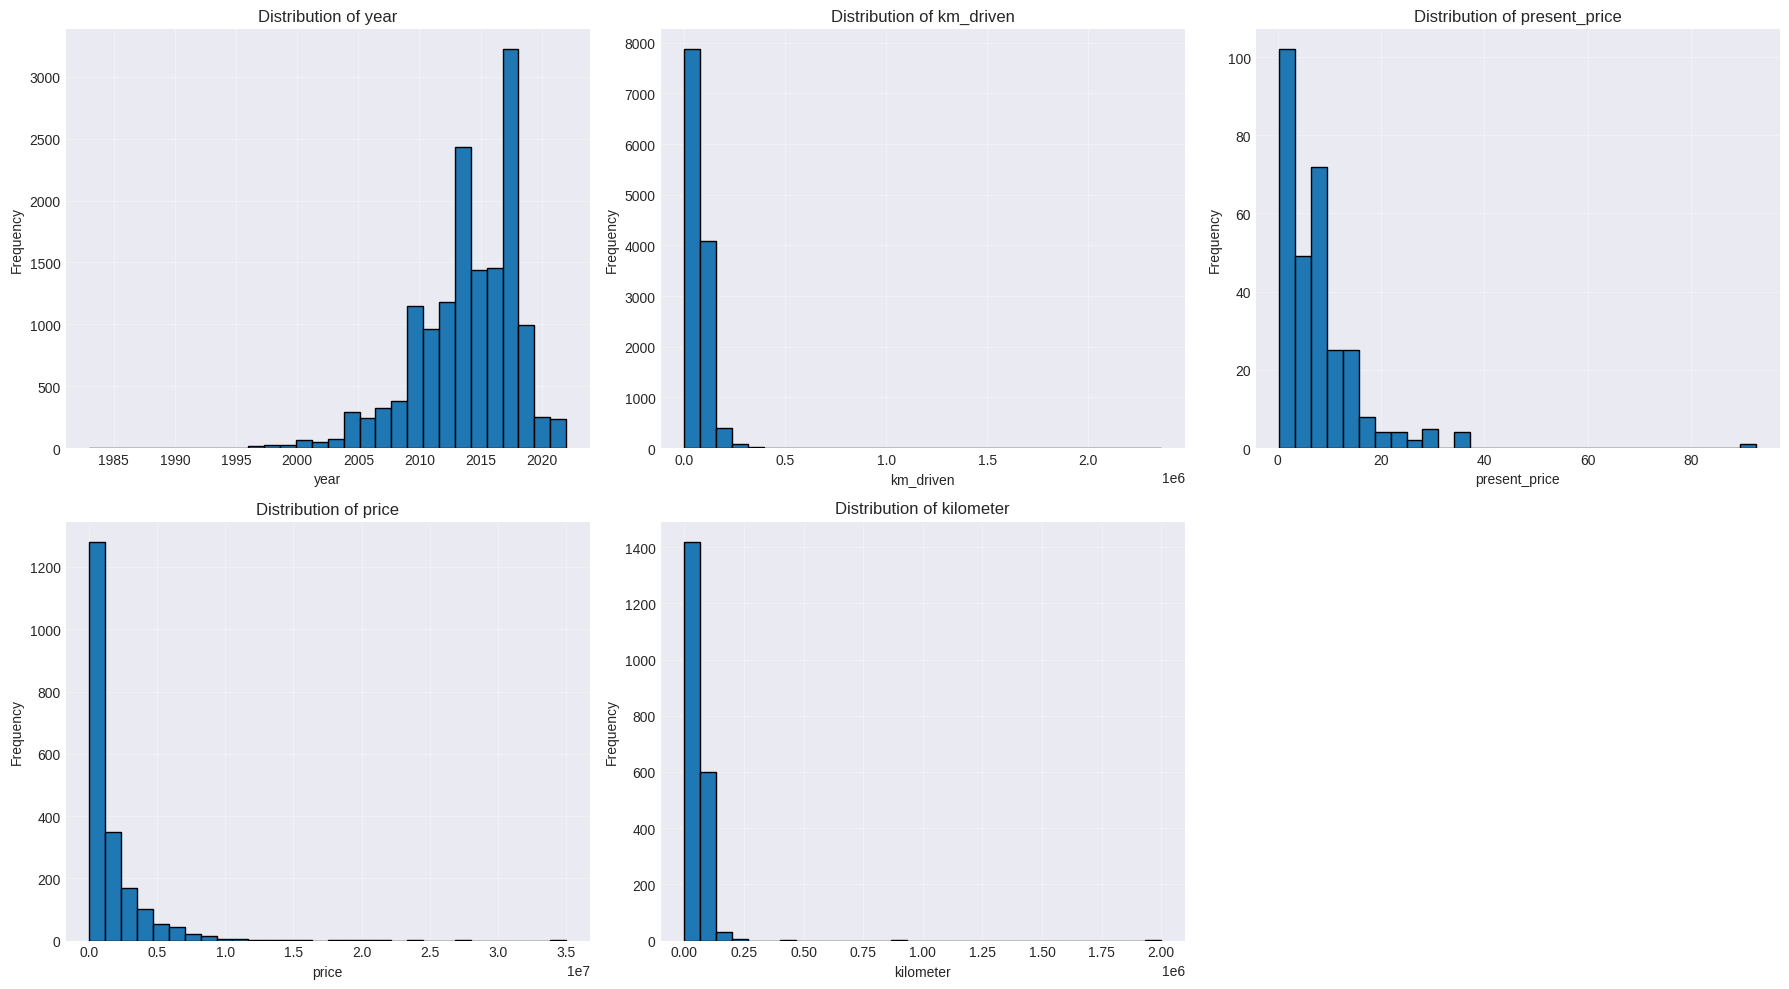

In [ ]:
# Distribution of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

# Hide empty subplots
for idx in range(len(key_numerical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

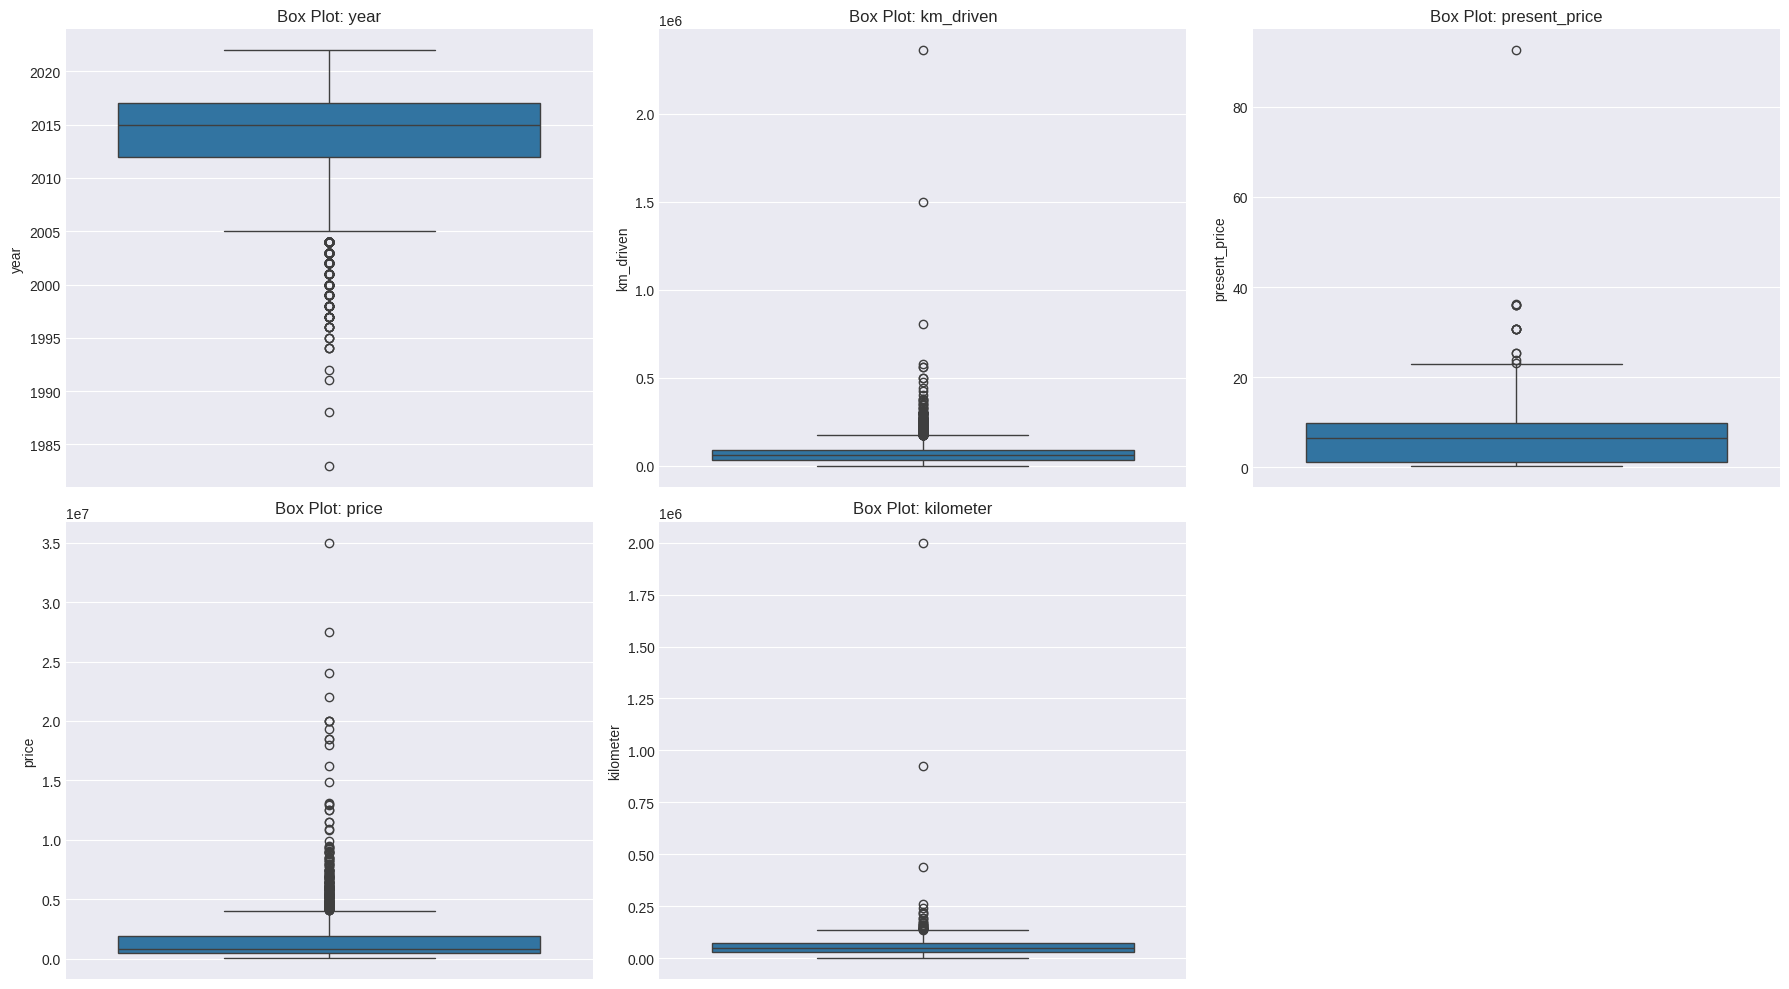

In [ ]:
# Box plots for key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if idx < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot: {col}')

# Hide empty subplots
for idx in range(len(key_numerical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 9. Univariate Analysis - Key Categorical Features

In [ ]:
# Select key categorical features
key_categorical = ['fuel', 'transmission', 'seller_type', 'owner', 'fuel_type', 'make']
key_categorical = [col for col in key_categorical if col in categorical_cols][:6]

print(f"Analyzing key categorical features: {key_categorical}")

Analyzing key categorical features: ['fuel', 'transmission', 'seller_type', 'owner', 'fuel_type', 'make']


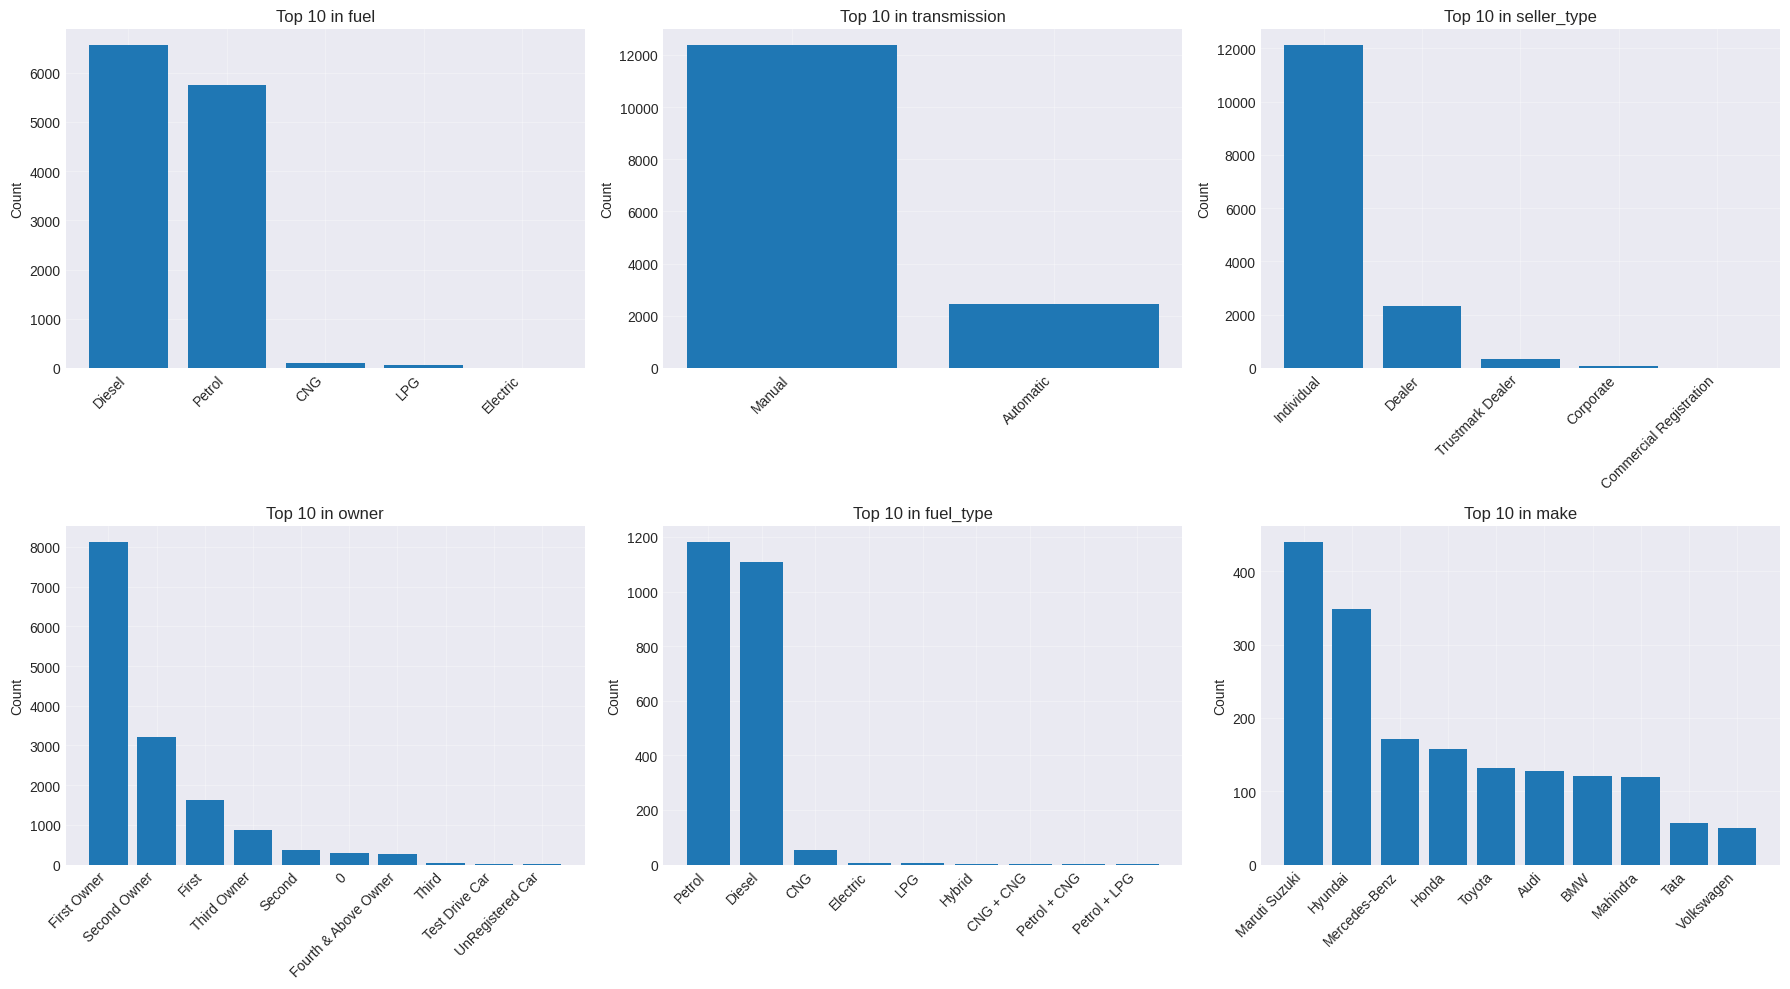

In [ ]:
# Count plots for key categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    if idx < len(axes):
        top_categories = df[col].value_counts().head(10)
        axes[idx].bar(range(len(top_categories)), top_categories.values)
        axes[idx].set_xticks(range(len(top_categories)))
        axes[idx].set_xticklabels(top_categories.index, rotation=45, ha='right')
        axes[idx].set_title(f'Top 10 in {col}')
        axes[idx].set_ylabel('Count')
        axes[idx].grid(alpha=0.3)

# Hide empty subplots
for idx in range(len(key_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 10. Bivariate Analysis - Numerical vs Target

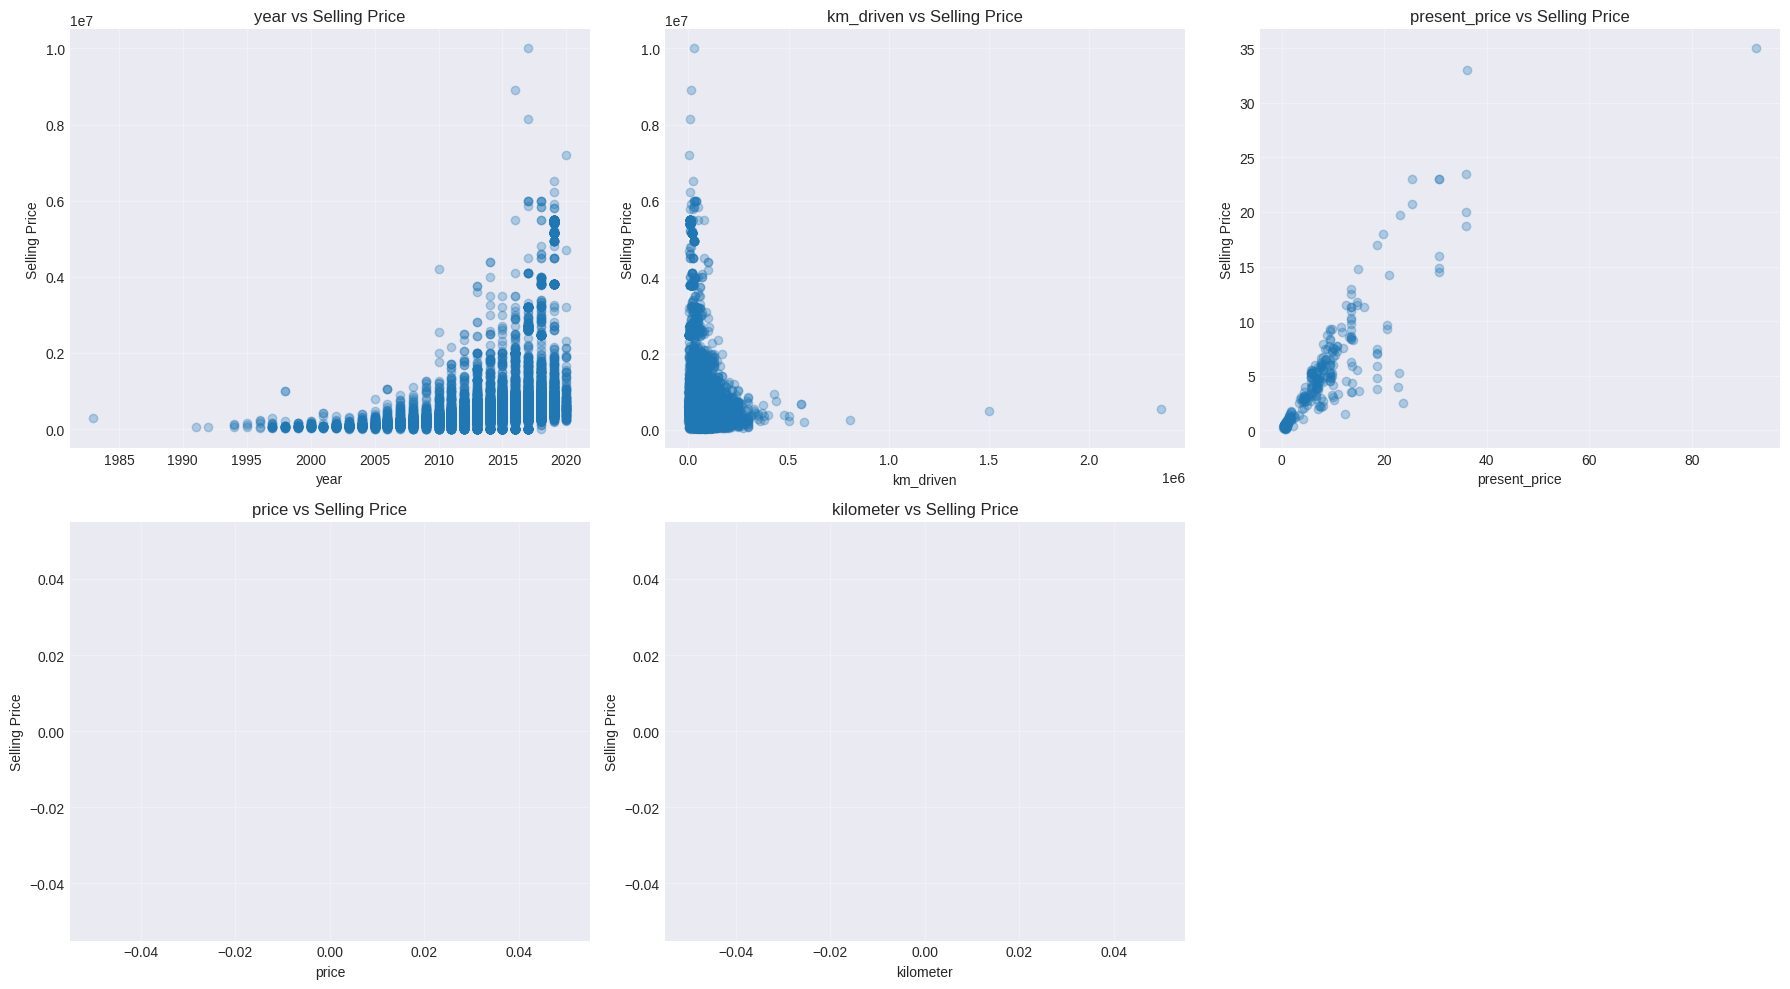

In [ ]:
# Scatter plots: Key numerical features vs Selling Price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if idx < len(axes):
        axes[idx].scatter(df[col], df['selling_price'], alpha=0.3)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Selling Price')
        axes[idx].set_title(f'{col} vs Selling Price')
        axes[idx].grid(alpha=0.3)

# Hide empty subplots
for idx in range(len(key_numerical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 11. Bivariate Analysis - Categorical vs Target

ValueError: List of boxplot statistics and `positions` values must have same the length

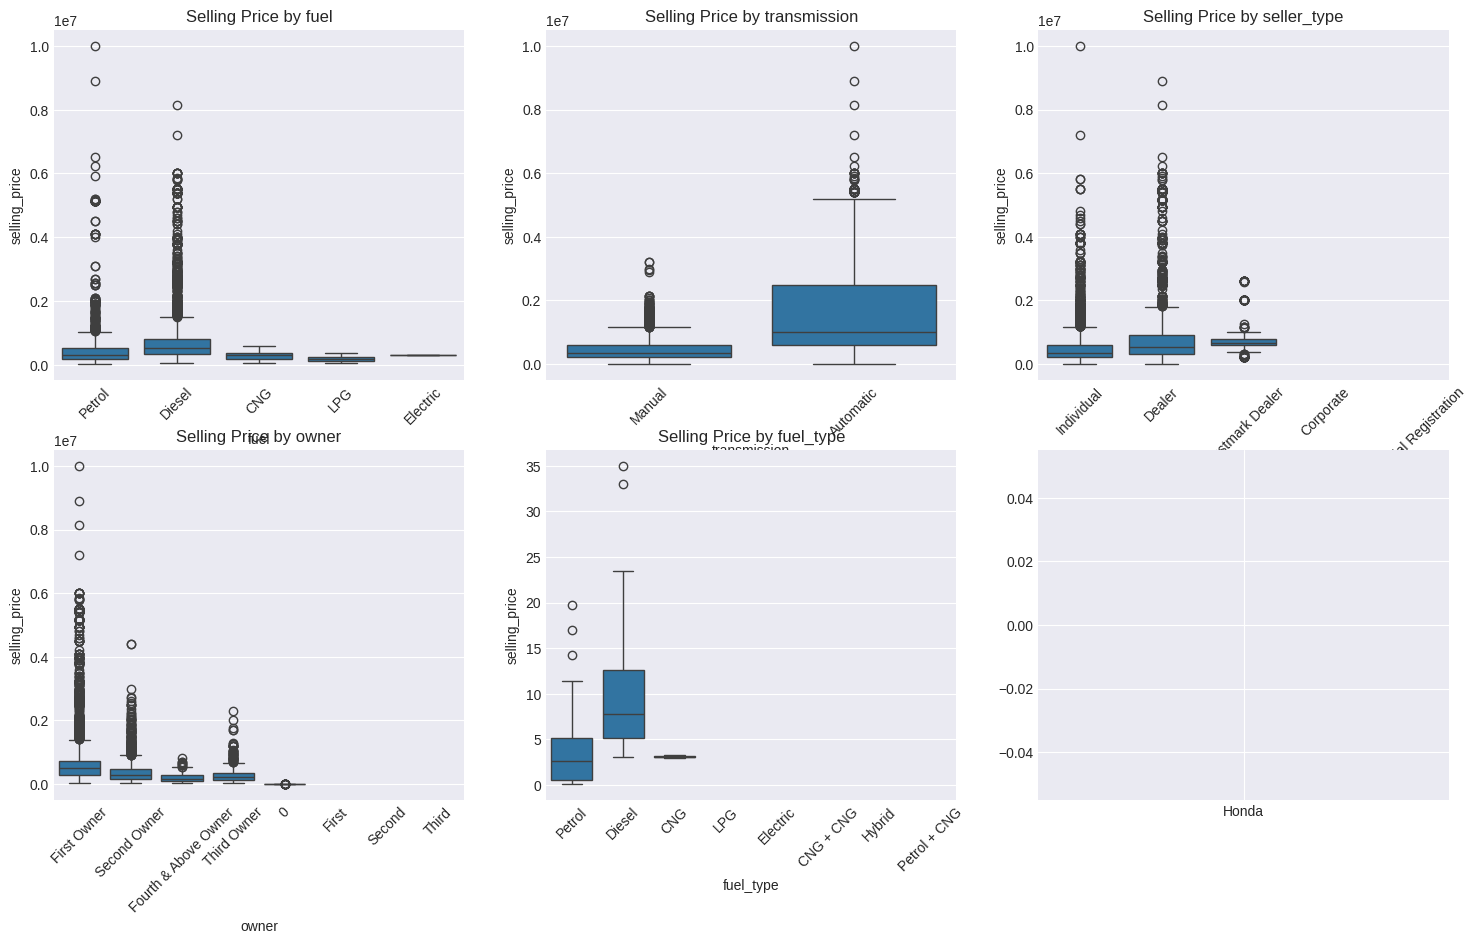

In [ ]:
# Box plots: Key categorical features vs Selling Price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    if idx < len(axes):
        # Select top categories
        top_cats = df[col].value_counts().head(8).index
        df_subset = df[df[col].isin(top_cats)]

        sns.boxplot(data=df_subset, x=col, y='selling_price', ax=axes[idx])
        axes[idx].set_title(f'Selling Price by {col}')
        axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(key_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 12. Correlation Analysis

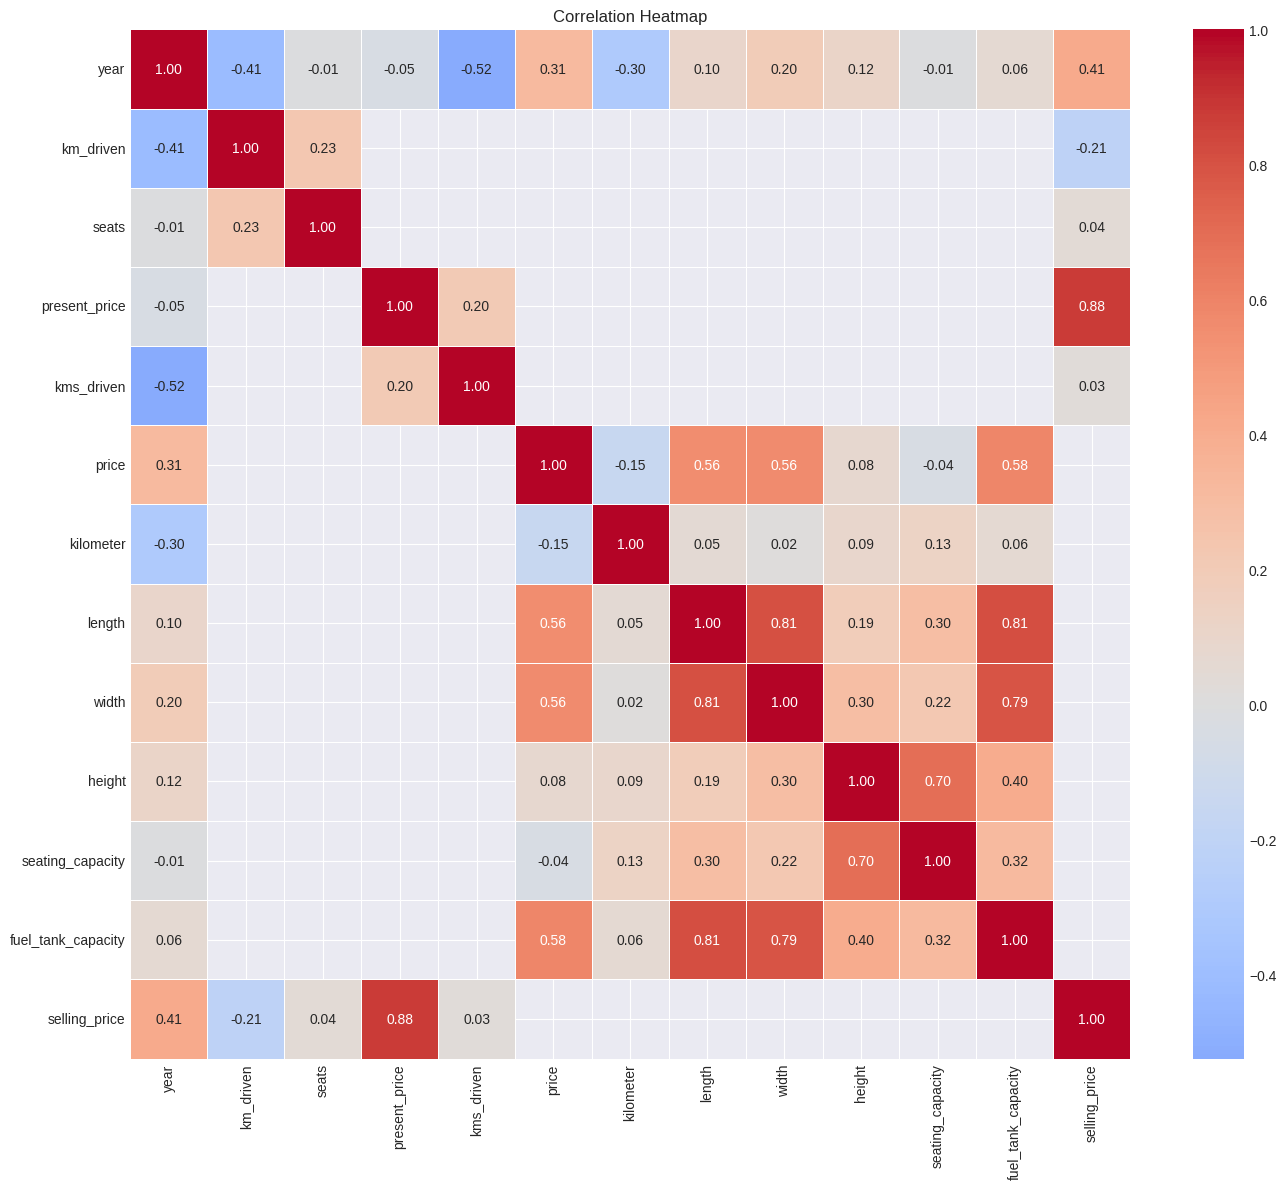

In [ ]:
# Correlation matrix for numerical features
corr_features = numerical_cols[:15] + ['selling_price'] if len(numerical_cols) > 15 else numerical_cols + ['selling_price']
correlation = df[corr_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation with target variable
target_corr = df[numerical_cols + ['selling_price']].corr()['selling_price'].sort_values(ascending=False)
print("Correlation with Selling Price:")
print(target_corr)

Correlation with Selling Price:
selling_price         1.000000
present_price         0.878983
year                  0.406616
seats                 0.041358
kms_driven            0.029187
km_driven            -0.213450
price                      NaN
kilometer                  NaN
length                     NaN
width                      NaN
height                     NaN
seating_capacity           NaN
fuel_tank_capacity         NaN
Name: selling_price, dtype: float64


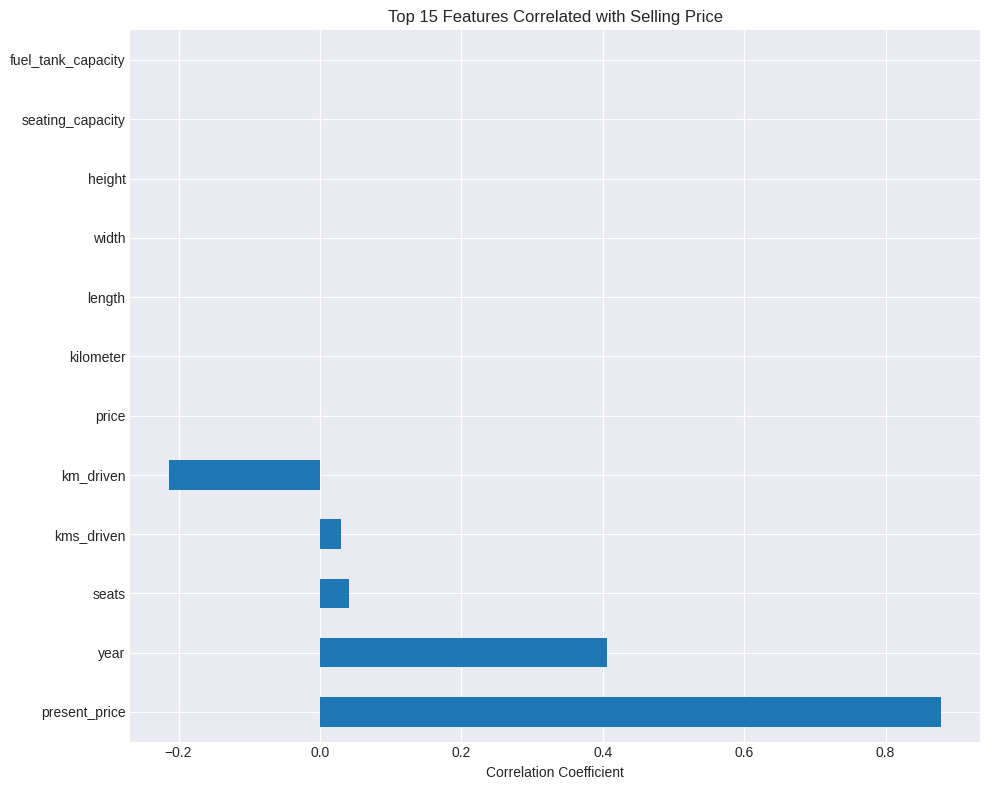

In [ ]:
# Visualize top correlations with target
top_corr = target_corr[1:16]  # Exclude target itself, show top 15
plt.figure(figsize=(10, 8))
top_corr.plot(kind='barh')
plt.title('Top 15 Features Correlated with Selling Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## 13. Outlier Detection

In [ ]:
# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [ ]:
# Outlier analysis for key numerical features
print("Outlier Analysis:")
for col in key_numerical:
    count, lower, upper = detect_outliers(df, col)
    print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")

Outlier Analysis:
year: 374 outliers (2.52%)
km_driven: 365 outliers (2.46%)
present_price: 14 outliers (0.09%)
price: 215 outliers (1.45%)
kilometer: 36 outliers (0.24%)


In [ ]:
# Outlier analysis for target variable
count, lower, upper = detect_outliers(df, 'selling_price')
print(f"\nSelling Price Outliers: {count} ({count/len(df)*100:.2f}%)")
print(f"Lower Bound: {lower:.2f}")
print(f"Upper Bound: {upper:.2f}")


Selling Price Outliers: 850 (5.73%)
Lower Bound: -412500.00
Upper Bound: 1287500.00


## 14. Data Preprocessing - Handle Missing Values

In [ ]:
# Create copy for preprocessing
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

Original dataset shape: (14828, 30)


In [ ]:
# Handle missing values in numerical columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
        print(f"Filled {col} with median")

Filled km_driven with median
Filled seats with median
Filled present_price with median
Filled kms_driven with median
Filled price with median
Filled kilometer with median
Filled length with median
Filled width with median
Filled height with median
Filled seating_capacity with median
Filled fuel_tank_capacity with median


In [ ]:
# Handle missing values in categorical columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
        print(f"Filled {col} with mode")

Filled name with mode
Filled fuel with mode
Filled mileage with mode
Filled engine with mode
Filled max_power with mode
Filled torque with mode
Filled car_name with mode
Filled fuel_type with mode
Filled make with mode
Filled model with mode
Filled location with mode
Filled color with mode
Filled max_torque with mode
Filled drivetrain with mode


In [ ]:
# Verify missing values are handled
print(f"\nMissing values after cleaning: {df_clean.isnull().sum().sum()}")


Missing values after cleaning: 2059


## 15. Data Preprocessing - Remove Duplicates

In [ ]:
# Remove duplicates
df_clean = df_clean.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_clean.shape}")

Dataset shape after removing duplicates: (12859, 30)


## 16. Data Preprocessing - Encode Categorical Variables

In [ ]:
# Initialize label encoders dictionary
label_encoders = {}


In [ ]:
# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    label_encoders[col] = le
    print(f"Encoded {col}")

print("\nAll categorical variables encoded")

Encoded name
Encoded fuel
Encoded seller_type
Encoded transmission
Encoded owner
Encoded mileage
Encoded engine
Encoded max_power
Encoded torque
Encoded car_name
Encoded fuel_type
Encoded make
Encoded model
Encoded location
Encoded color
Encoded max_torque
Encoded drivetrain

All categorical variables encoded


## 17. Feature Selection - Prepare X and y

In [ ]:
# Separate features and target
X = df_clean.drop(['selling_price'], axis=1)
y = df_clean['selling_price']

print(f"Features shape: {X.shape}")


Features shape: (12859, 29)
Target shape: (12859,)


In [ ]:
y = y.fillna(y.mean())
print(f"Target shape: {y.shape}")

Target shape: (12859,)


In [ ]:
# Display feature columns
print("Feature Columns:")
print(X.columns.tolist())

Feature Columns:
['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'car_name', 'present_price', 'kms_driven', 'fuel_type', 'make', 'model', 'price', 'kilometer', 'location', 'color', 'max_torque', 'drivetrain', 'length', 'width', 'height', 'seating_capacity', 'fuel_tank_capacity']


In [ ]:
# Check for any remaining missing values
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")


Missing values in X: 0
Missing values in y: 0


## 18. Train-Test Split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 10287 samples (80.0%)
Test set: 2572 samples (20.0%)


In [ ]:
# Check target distribution in train and test
print(f"\nTraining set mean price: {y_train.mean():.2f}")
print(f"Test set mean price: {y_test.mean():.2f}")


Training set mean price: 492638.98
Test set mean price: 472422.15


## 19. Feature Scaling

In [ ]:
# Initialize scaler
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


## 20. Model Training - Random Forest Regressor

In [ ]:
# Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf_model

RandomForestRegressor(max_depth=15, n_jobs=-1, random_state=42)

In [ ]:
# Train model
rf_model.fit(X_train, y_train)
print("Random Forest training completed")

Random Forest training completed


In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
print("Predictions completed")

Predictions completed


In [ ]:
# Evaluate Random Forest
print("="*60)
print("RANDOM FOREST REGRESSOR RESULTS")
print("="*60)
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_rf)*100:.2f}%")

RANDOM FOREST REGRESSOR RESULTS
R2 Score: 0.8039
MAE: 80031.19
RMSE: 175857.38
MAPE: 9887.01%


## 21. Model Training - AdaBoost Regressor

In [ ]:
# Initialize AdaBoost
ada_model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

print("Training AdaBoost Regressor...")

Training AdaBoost Regressor...


In [ ]:
# Train model
ada_model.fit(X_train, y_train)
print("AdaBoost training completed")

AdaBoost training completed


In [ ]:
# Make predictions
y_pred_ada = ada_model.predict(X_test)
print("Predictions completed")

Predictions completed


In [ ]:
# Evaluate AdaBoost
print("="*60)
print("ADABOOST REGRESSOR RESULTS")
print("="*60)
print(f"R2 Score: {r2_score(y_test, y_pred_ada):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ada):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ada)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_ada)*100:.2f}%")

ADABOOST REGRESSOR RESULTS
R2 Score: -5.3599
MAE: 963281.04
RMSE: 1001492.98
MAPE: 3054051.27%


## 22. Model Training - XGBoost Regressor

In [ ]:
# Initialize XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print("Training XGBoost Regressor...")

Training XGBoost Regressor...


In [ ]:
# Train model
xgb_model.fit(X_train, y_train)
print("XGBoost training completed")

XGBoost training completed


In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
print("Predictions completed")

Predictions completed


In [ ]:
# Evaluate XGBoost
print("="*60)
print("XGBOOST REGRESSOR RESULTS")
print("="*60)
print(f"R2 Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_xgb)*100:.2f}%")

XGBOOST REGRESSOR RESULTS
R2 Score: 0.8399
MAE: 77786.85
RMSE: 158892.80
MAPE: 27472.80%


## 23. Model Training - LightGBM Regressor

In [ ]:
# Initialize LightGBM
lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbose=-1
)

print("Training LightGBM Regressor...")

Training LightGBM Regressor...


In [ ]:
# Train model
lgb_model.fit(X_train, y_train)
print("LightGBM training completed")

LightGBM training completed


In [ ]:
# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
print("Predictions completed")

Predictions completed


In [ ]:
# Evaluate LightGBM
print("="*60)
print("LIGHTGBM REGRESSOR RESULTS")
print("="*60)
print(f"R2 Score: {r2_score(y_test, y_pred_lgb):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lgb)):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_lgb)*100:.2f}%")

LIGHTGBM REGRESSOR RESULTS
R2 Score: 0.8303
MAE: 83262.01
RMSE: 163587.49
MAPE: 57219.80%


## 24. Model Comparison

In [ ]:
# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'XGBoost', 'LightGBM'],
    'R2_Score': [
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_ada),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgb)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_ada),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_lgb)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_ada)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    ],
    'MAPE': [
        mean_absolute_percentage_error(y_test, y_pred_rf) * 100,
        mean_absolute_percentage_error(y_test, y_pred_ada) * 100,
        mean_absolute_percentage_error(y_test, y_pred_xgb) * 100,
        mean_absolute_percentage_error(y_test, y_pred_lgb) * 100
    ]
})

In [ ]:
# Sort by R2 Score
models_comparison = models_comparison.sort_values('R2_Score', ascending=False)
print("\n" + "="*80)
print("ENSEMBLE REGRESSION MODELS COMPARISON")
print("="*80)
print(models_comparison.to_string(index=False))
print("="*80)


ENSEMBLE REGRESSION MODELS COMPARISON
        Model  R2_Score           MAE         RMSE         MAPE
      XGBoost  0.839912  77786.853693 1.588928e+05 2.747280e+04
     LightGBM  0.830312  83262.012615 1.635875e+05 5.721980e+04
Random Forest  0.803902  80031.193036 1.758574e+05 9.887006e+03
     AdaBoost -5.359852 963281.040213 1.001493e+06 3.054051e+06


## 25. Visualization - Model Performance Comparison

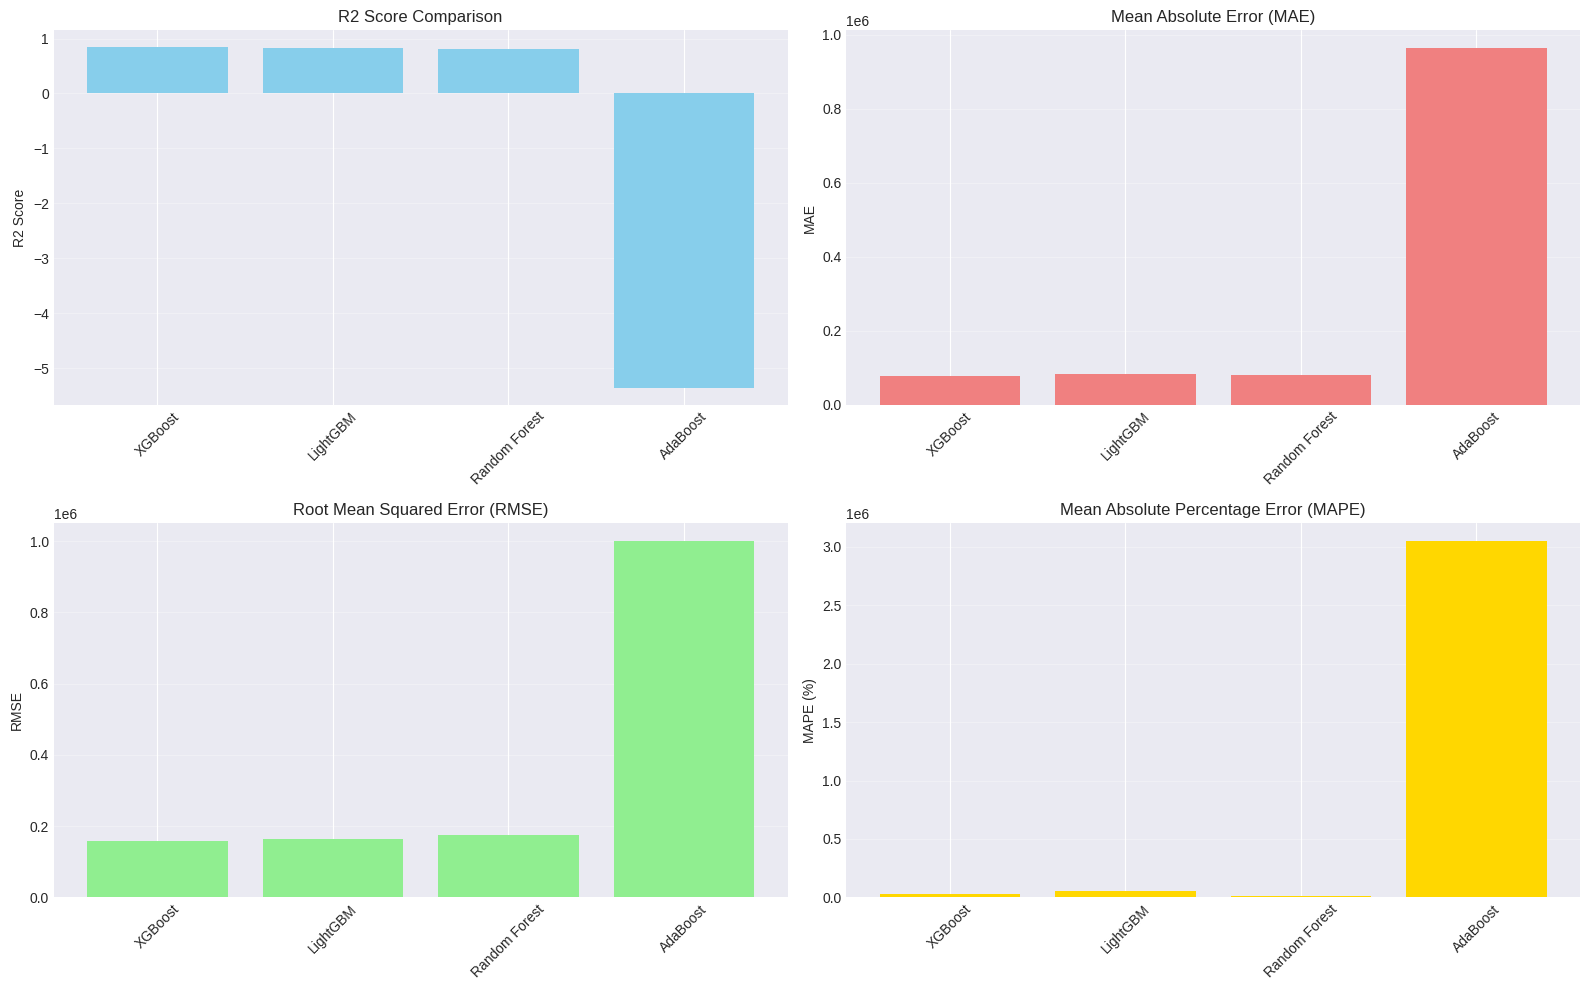

In [ ]:
# Performance metrics bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# R2 Score
axes[0, 0].bar(models_comparison['Model'], models_comparison['R2_Score'], color='skyblue')
axes[0, 0].set_title('R2 Score Comparison')
axes[0, 0].set_ylabel('R2 Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# MAE
axes[0, 1].bar(models_comparison['Model'], models_comparison['MAE'], color='lightcoral')
axes[0, 1].set_title('Mean Absolute Error (MAE)')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# RMSE
axes[1, 0].bar(models_comparison['Model'], models_comparison['RMSE'], color='lightgreen')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# MAPE
axes[1, 1].bar(models_comparison['Model'], models_comparison['MAPE'], color='gold')
axes[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 1].set_ylabel('MAPE (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 26. Visualization - Actual vs Predicted

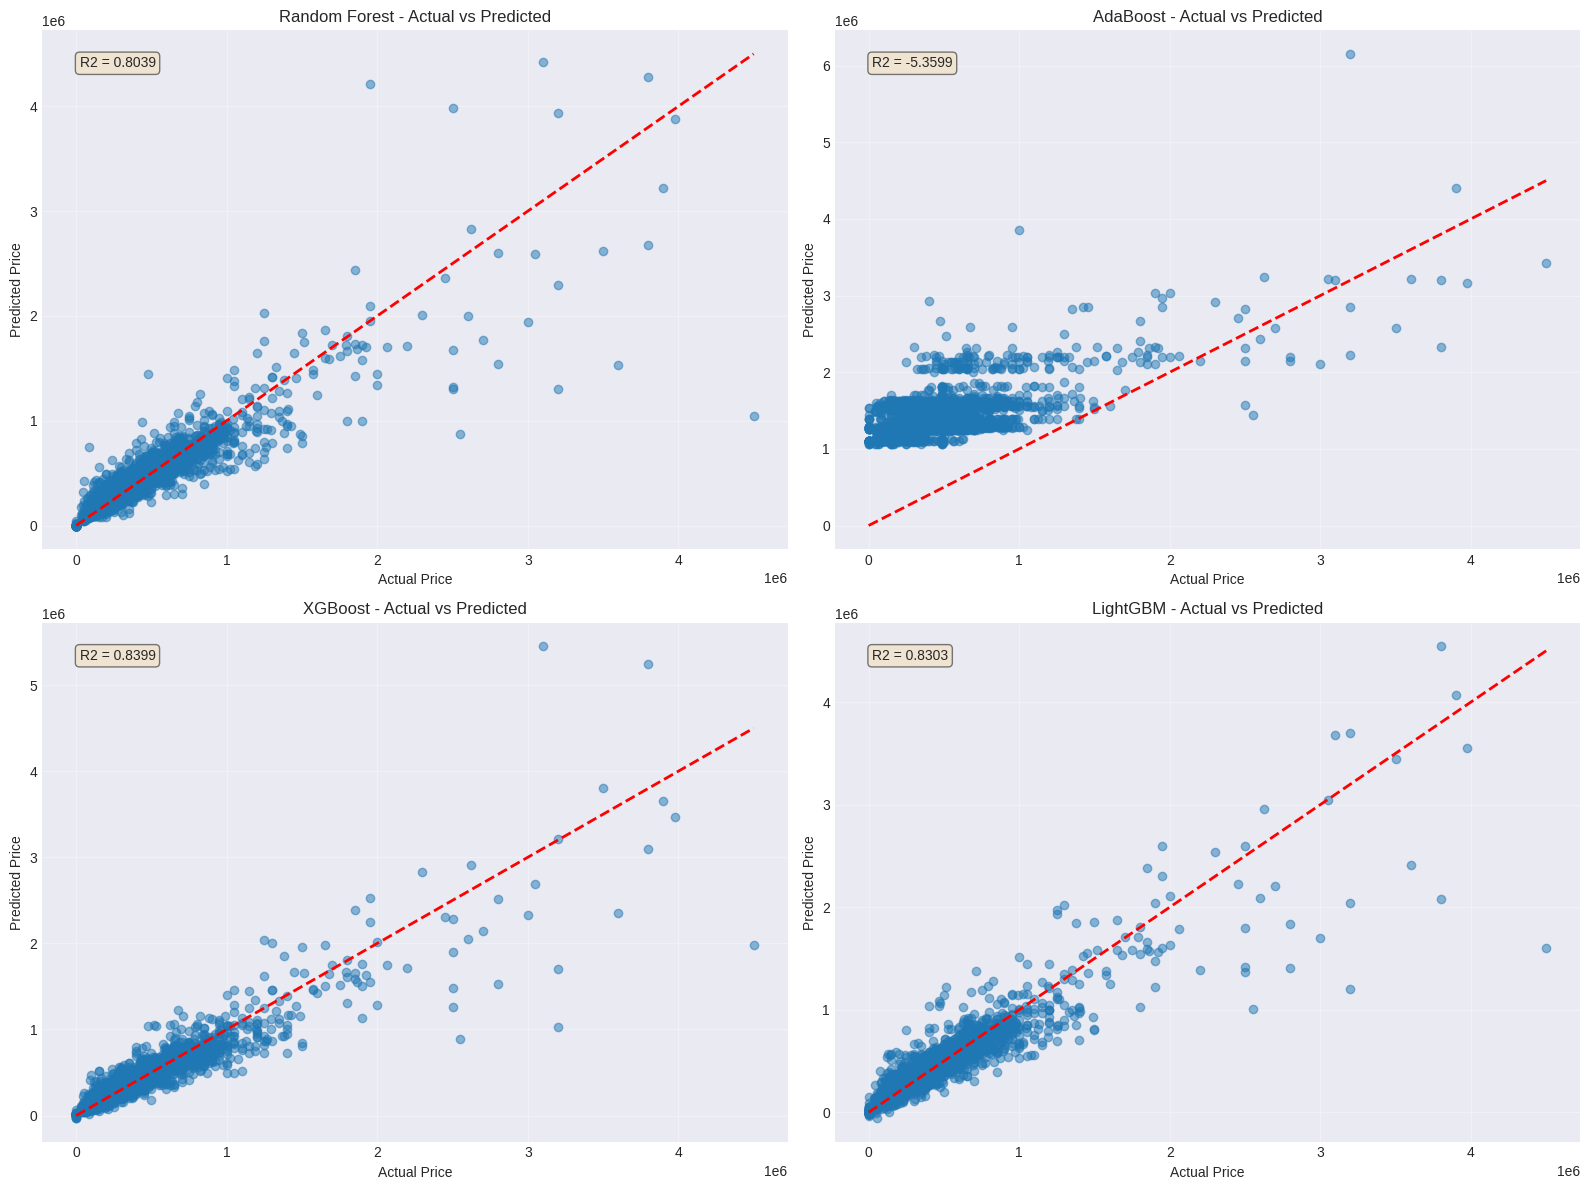

In [ ]:
# Scatter plots: Actual vs Predicted
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

predictions = [
    ('Random Forest', y_pred_rf),
    ('AdaBoost', y_pred_ada),
    ('XGBoost', y_pred_xgb),
    ('LightGBM', y_pred_lgb)
]

for idx, (name, y_pred) in enumerate(predictions):
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Price')
    axes[idx].set_ylabel('Predicted Price')
    axes[idx].set_title(f'{name} - Actual vs Predicted')
    axes[idx].grid(alpha=0.3)

    # Add R2 score
    r2 = r2_score(y_test, y_pred)
    axes[idx].text(0.05, 0.95, f'R2 = {r2:.4f}',
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 27. Visualization - Residual Analysis

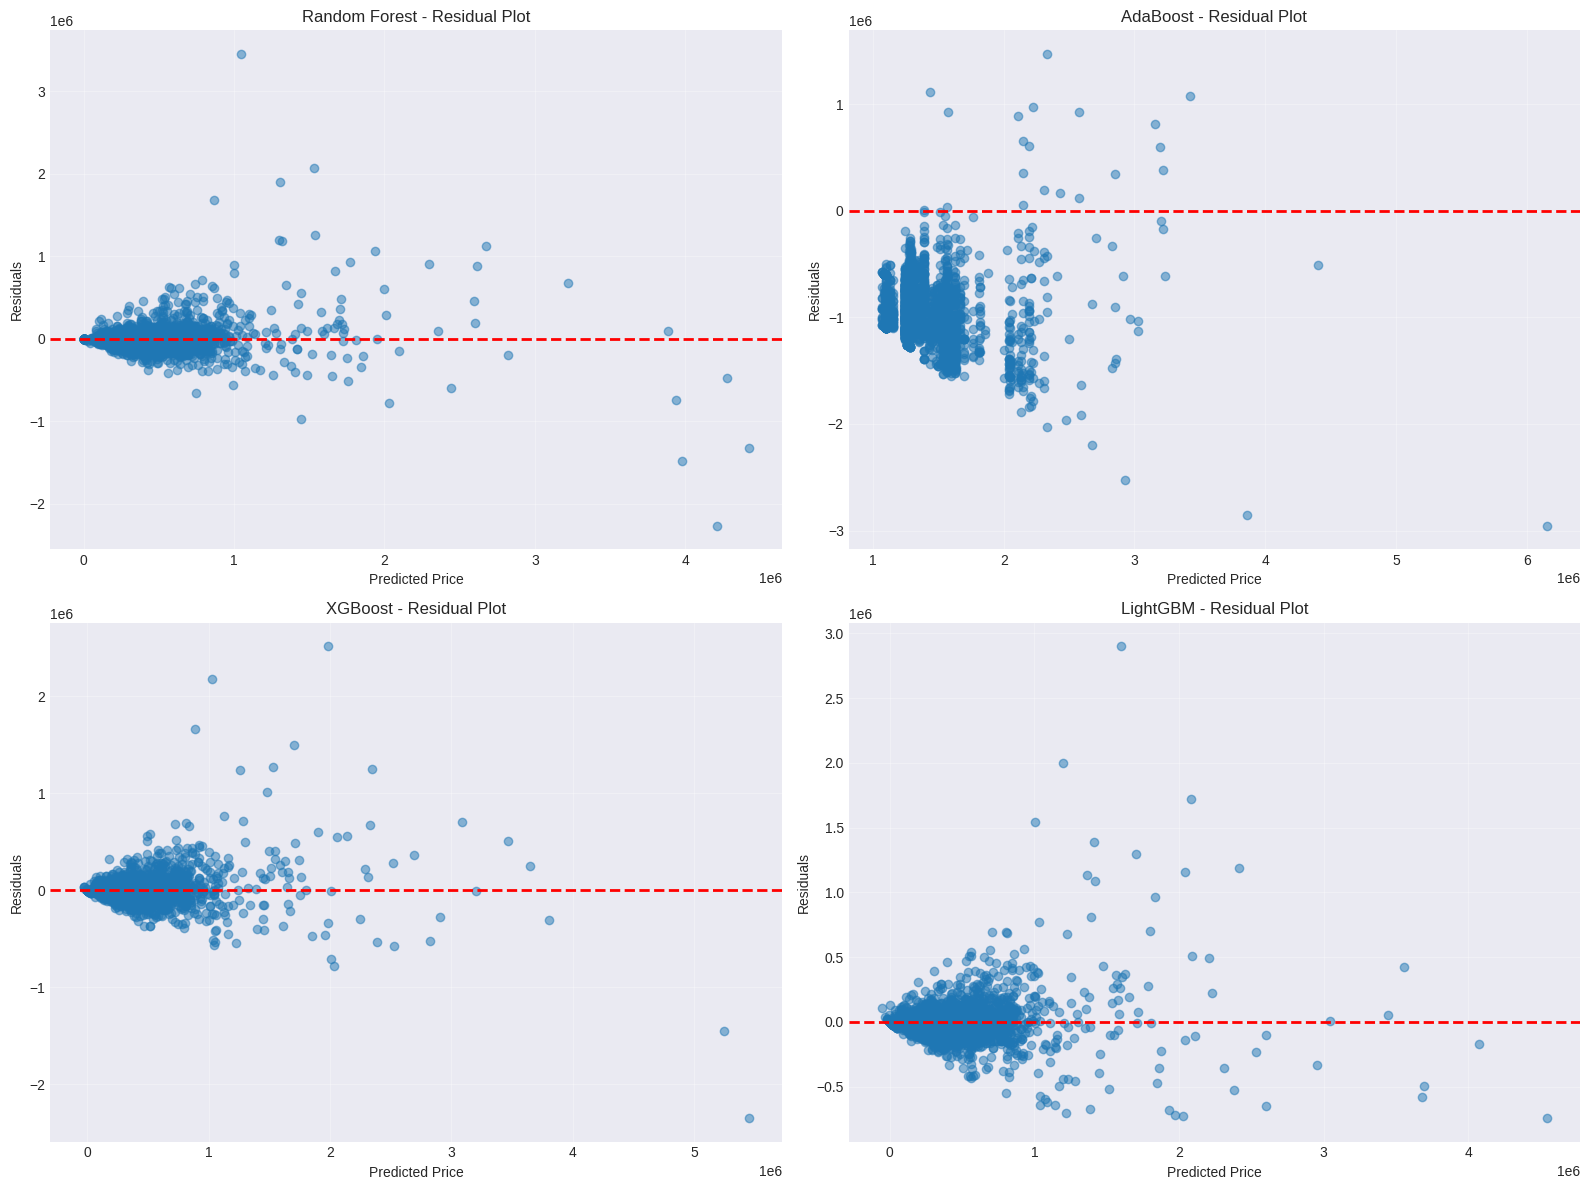

In [ ]:
# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, (name, y_pred) in enumerate(predictions):
    residuals = y_test - y_pred
    axes[idx].scatter(y_pred, residuals, alpha=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Price')
    axes[idx].set_ylabel('Residuals')
    axes[idx].set_title(f'{name} - Residual Plot')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 28. Hyperparameter Tuning - Random Forest

In [ ]:
# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}
rf_params

{'n_estimators': [100, 200],
 'max_depth': [10, 15, 20],
 'min_samples_split': [2, 5]}

In [ ]:
# Grid search
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [ ]:
# Best parameters
print(f"Best RF Parameters: {rf_grid.best_params_}")
print(f"Best RF Cross-Validation R2: {rf_grid.best_score_:.4f}")

Best RF Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best RF Cross-Validation R2: 0.7787


## 29. Hyperparameter Tuning - XGBoost

In [ ]:
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

print("Starting XGBoost hyperparameter tuning...")

Starting XGBoost hyperparameter tuning...


In [ ]:
# Grid search
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42),
    xgb_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [ ]:
# Best parameters
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost Cross-Validation R2: {xgb_grid.best_score_:.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best XGBoost Cross-Validation R2: 0.8151


## 30. Hyperparameter Tuning - LightGBM

In [ ]:
# Define parameter grid for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
lgb_params

{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1],
 'max_depth': [3, 5, 7]}

In [ ]:
# Grid search
lgb_grid = GridSearchCV(
    lgb.LGBMRegressor(random_state=42, verbose=-1),
    lgb_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
lgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42, verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [ ]:
# Best parameters
print(f"Best LightGBM Parameters: {lgb_grid.best_params_}")
print(f"Best LightGBM Cross-Validation R2: {lgb_grid.best_score_:.4f}")

Best LightGBM Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best LightGBM Cross-Validation R2: 0.7873


## 31. Evaluate Tuned Models

In [ ]:
# Store tuned models
tuned_models = {
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_,
    'LightGBM': lgb_grid.best_estimator_
}

In [ ]:
# Evaluate all tuned models
tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)

    tuned_results.append({
        'Model': name,
        'R2_Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred) * 100
    })

In [ ]:
# Display tuned models performance
tuned_df = pd.DataFrame(tuned_results).sort_values('R2_Score', ascending=False)
print("\n" + "="*80)
print("TUNED MODELS PERFORMANCE ON TEST SET")
print("="*80)
print(tuned_df.to_string(index=False))
print("="*80)


TUNED MODELS PERFORMANCE ON TEST SET
        Model  R2_Score          MAE         RMSE         MAPE
     LightGBM  0.849792 78710.161800 153911.24951 51795.099521
      XGBoost  0.846594 70181.795222 155540.99330 18470.833687
Random Forest  0.819165 73753.875832 168875.29144 16090.221029


## 32. Feature Importance Analysis - Random Forest

In [ ]:
# Get feature importance from tuned Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Important Features (Random Forest):")
print(feature_importance_rf.head(15))

Top 15 Important Features (Random Forest):
         Feature  Importance
0           name    0.325108
1           year    0.215778
10        torque    0.111005
7        mileage    0.098852
2      km_driven    0.074773
9      max_power    0.058081
5   transmission    0.033264
3           fuel    0.030281
6          owner    0.025304
8         engine    0.013081
4    seller_type    0.005273
11         seats    0.004456
18         price    0.002249
17         model    0.002094
19     kilometer    0.000105


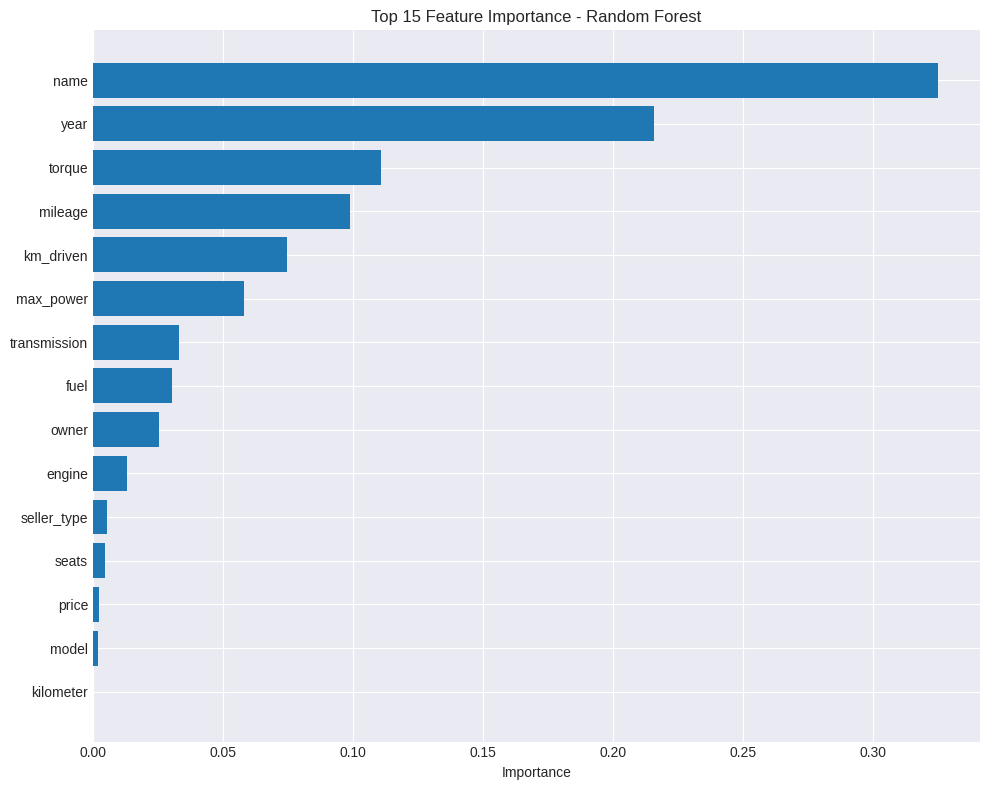

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'][:15], feature_importance_rf['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 33. Feature Importance Analysis - XGBoost

In [ ]:
# Get feature importance from tuned XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Important Features (XGBoost):")
print(feature_importance_xgb.head(15))

Top 15 Important Features (XGBoost):
               Feature  Importance
10              torque    0.164160
7              mileage    0.111296
3                 fuel    0.110278
0                 name    0.105690
9            max_power    0.099759
1                 year    0.099610
5         transmission    0.094565
6                owner    0.047094
17               model    0.037875
18               price    0.036018
8               engine    0.026882
4          seller_type    0.021384
2            km_driven    0.020542
11               seats    0.018565
28  fuel_tank_capacity    0.001984


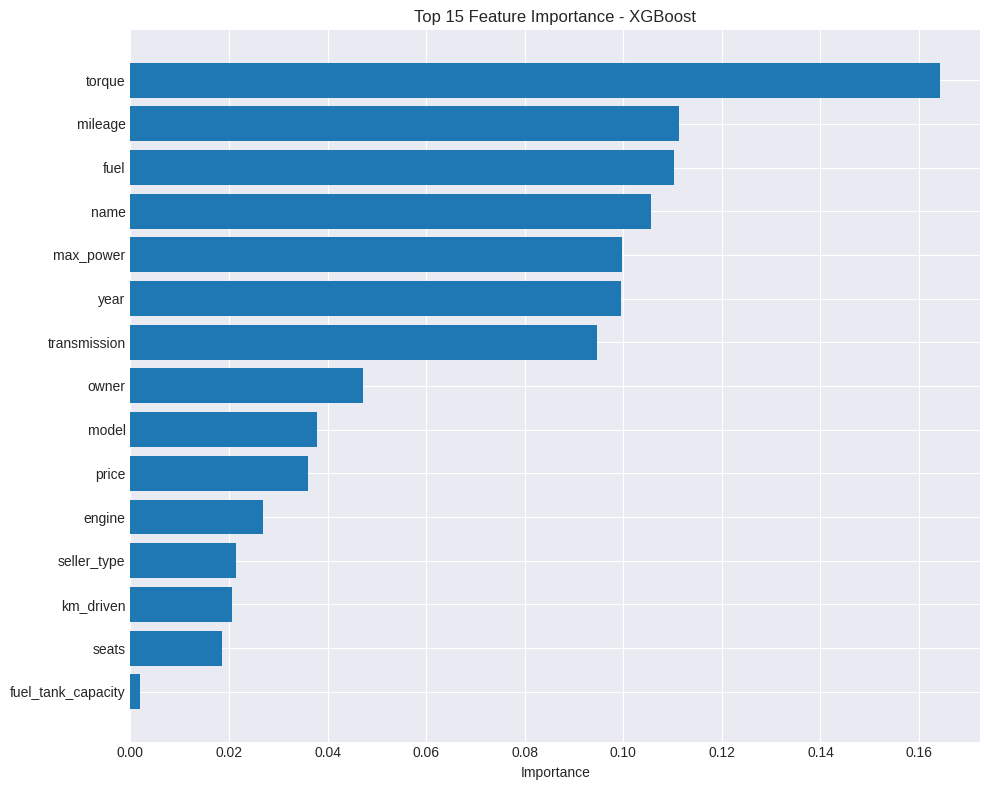

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_xgb['Feature'][:15], feature_importance_xgb['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 34. Save Best Model

In [ ]:
# Identify best model
best_model_name = tuned_df.iloc[0]['Model']
best_model = tuned_models[best_model_name]

print(f"Best Model: {best_model_name}")

Best Model: LightGBM


In [ ]:
# Save model
joblib.dump(best_model, 'best_car_price_model.pkl')
print("Model saved as 'best_car_price_model.pkl'")

Model saved as 'best_car_price_model.pkl'


In [ ]:
# Save scaler
joblib.dump(scaler, 'scaler_car_price.pkl')
print("Scaler saved as 'scaler_car_price.pkl'")

Scaler saved as 'scaler_car_price.pkl'


In [ ]:
# Save label encoders
joblib.dump(label_encoders, 'label_encoders_car_price.pkl')
print("Label encoders saved as 'label_encoders_car_price.pkl'")

Label encoders saved as 'label_encoders_car_price.pkl'


## 35. Final Summary Report

# Final Project Summary – Used Car Price Prediction

## Dataset Information
- **Total Records:** 12,859  
- **Total Features:** 29  
- **Training Samples:** 10,287  
- **Test Samples:** 2,572  
- **Average Price:** 488,595.30  
- **Price Range:** 0.10 – 10,000,000.00  

## Models Evaluated
1. Random Forest Regressor  
2. AdaBoost Regressor  
3. XGBoost Regressor  
4. LightGBM Regressor  

## Best Model: LightGBM
- **R² Score:** 0.8498  
- **MAE:** 78,710.16  
- **RMSE:** 153,911.25  
- **MAPE:** 51,795.10%  

## Key Insights
- **Most Important Feature:** Torque  
- **Model explains:** 84.98% of price variance  
- **Average prediction error:** 78,710.16  

---

**Project completed successfully**
